In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/dataset_cal.csv')


In [21]:
S1 = data.loc[data['Subject'] == 'S1']
S1_X = S1.iloc[:, 1:34]
S1_y = S1.iloc[:, 0]


#Data preparation

In [4]:
remove = ["Subject", "Activity"]
features = [column for column in list(data.columns) if column not in remove]
data['Gender'].replace(' f', 0, inplace=True)
data['Gender'].replace(' m', 1, inplace=True)
data

,label,chest_ACC_x_mean,chest_ACC_y_mean,chest_ACC_z_mean,chest_ECG_mean,chest_Resp_mean,wrist_ACC_x_mean,wrist_ACC_y_mean,wrist_ACC_z_mean,wrist_EDA_mean,...,wrist_TEMP_median,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Subject
0,49.611369,0.851230,-0.066021,-0.369793,0.039022,1.320817,-0.761230,-0.076416,0.671875,4.716672,...,32.155,78.0,1,34,182.0,3,6,0,0,S1
1,50.323992,0.853035,-0.064653,-0.372883,-0.037044,-1.524349,-0.766602,-0.076172,0.680420,4.692810,...,32.150,78.0,1,34,182.0,3,6,1,0,S1
2,52.708336,0.862127,-0.063661,-0.328341,0.021329,0.497232,-0.871338,-0.362305,0.287842,4.709465,...,32.150,78.0,1,34,182.0,3,6,0,0,S1
3,55.640794,0.884370,-0.063035,-0.265127,0.006393,0.409606,-0.979004,-0.150635,0.195068,4.748541,...,32.140,78.0,1,34,182.0,3,6,0,0,S1
4,57.658406,0.889886,-0.042930,-0.247533,-0.024418,-0.779251,-1.002930,-0.099609,0.148926,4.765036,...,32.155,78.0,1,34,182.0,3,6,0,0,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,75.475622,0.894839,0.011158,-0.214601,-0.008444,0.712193,-0.710205,0.671631,0.156250,0.956780,...,34.015,79.0,1,28,183.0,2,5,1,2,S15
64693,77.524511,0.895650,0.014221,-0.217153,0.000331,0.364633,-0.454102,-0.193848,0.840088,0.943969,...,34.000,79.0,1,28,183.0,2,5,0,2,S15
64694,78.714945,0.893826,0.022179,-0.202851,0.021754,-0.179085,-0.669678,-0.124756,0.505371,0.943969,...,34.000,79.0,1,28,183.0,2,5,1,2,S15
64695,80.413954,0.896889,0.022090,-0.203860,-0.013849,0.442674,-0.351074,-0.044678,0.890381,0.937724,...,34.000,79.0,1,28,183.0,2,5,0,2,S15


In [5]:
train_data = data.drop(columns = ['WEIGHT','Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT', 'Activity','Subject','Rpeaks' ], inplace = False)

In [6]:
y = train_data['label']
X = train_data.drop(columns = ['label'],inplace = False)

#Train and test datasets split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

y.astype(np.float32)
X.astype(np.float32)

(38818, 33) (38818,) (25879, 33) (25879,)


,chest_ACC_x_mean,chest_ACC_y_mean,chest_ACC_z_mean,chest_ECG_mean,chest_Resp_mean,wrist_ACC_x_mean,wrist_ACC_y_mean,wrist_ACC_z_mean,wrist_EDA_mean,wrist_BVP_mean,...,chest_ACC_y_median,chest_ACC_z_median,chest_ECG_median,chest_Resp_median,wrist_ACC_x_median,wrist_ACC_y_median,wrist_ACC_z_median,wrist_EDA_median,wrist_BVP_median,wrist_TEMP_median
0,0.851230,-0.066021,-0.369793,0.039022,1.320817,-0.761230,-0.076416,0.671875,4.716672,-7.619219,...,-0.0658,-0.3698,-0.003960,1.320648,-0.765625,-0.078125,0.671875,4.716672,-2.425,32.154999
1,0.853035,-0.064653,-0.372883,-0.037044,-1.524349,-0.766602,-0.076172,0.680420,4.692810,7.464063,...,-0.0654,-0.3742,-0.037857,-2.276611,-0.765625,-0.078125,0.671875,4.693611,15.590,32.150002
2,0.862127,-0.063661,-0.328341,0.021329,0.497232,-0.871338,-0.362305,0.287842,4.709465,-19.324688,...,-0.0680,-0.3374,-0.026161,0.612640,-0.828125,-0.406250,0.296875,4.710907,-14.910,32.150002
3,0.884370,-0.063035,-0.265127,0.006393,0.409606,-0.979004,-0.150635,0.195068,4.748541,10.776719,...,-0.0494,-0.2516,-0.044014,0.433350,-1.000000,-0.125000,0.156250,4.748061,14.345,32.139999
4,0.889886,-0.042930,-0.247533,-0.024418,-0.779251,-1.002930,-0.099609,0.148926,4.765036,15.263047,...,-0.0444,-0.2472,-0.037651,-0.827789,-1.000000,-0.078125,0.140625,4.764075,38.125,32.154999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,0.894839,0.011158,-0.214601,-0.008444,0.712193,-0.710205,0.671631,0.156250,0.956779,-3.816328,...,0.0106,-0.2202,-0.039688,0.665283,-0.640625,0.695312,0.117188,0.951496,-9.900,34.014999
64693,0.895650,0.014221,-0.217153,0.000331,0.364633,-0.454102,-0.193848,0.840088,0.943969,-6.773203,...,0.0146,-0.2168,-0.045273,-0.077820,-0.429688,-0.187500,0.859375,0.941887,-6.995,34.000000
64694,0.893826,0.022179,-0.202851,0.021754,-0.179085,-0.669678,-0.124756,0.505371,0.943969,8.764375,...,0.0152,-0.2136,-0.029800,0.343323,-0.390625,-0.195312,0.882812,0.945090,10.175,34.000000
64695,0.896889,0.022090,-0.203860,-0.013849,0.442674,-0.351074,-0.044678,0.890381,0.937724,-6.218515,...,0.0214,-0.2038,-0.056717,0.968933,-0.312500,-0.046875,0.937500,0.939965,-6.620,34.000000


#Linear regression model

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

y_pred_LR = regressor_LR.predict(X_val)
mae_LR = mean_absolute_error(y_val, y_pred_LR)
mae_LR

12.89468286179714

In [22]:
S1_pred_LR = regressor_LR.predict(S1_X)
mean_absolute_error(S1_pred_LR, S1_y)

12.623786766981238

#SVM Model(RBF)

In [13]:
#support vector machine
from sklearn.svm import SVR
SVM_RBF = SVR(kernel = 'rbf')
SVM_RBF.fit(X_train, y_train)
y_pred_RBF = SVM_RBF.predict(X_val)
mae_RBF = mean_absolute_error(y_val, y_pred_RBF)
mae_RBF

14.788989008422787

In [17]:
S1_pred_SVM_RBF = SVM_RBF.predict(S1_X)
mean_absolute_error(S1_pred_SVM_RBF, S1_y)

15.144970955059996

#SVM Model(Linear)

In [14]:
SVM_Linear = SVR(kernel="linear")
SVM_Linear.fit(X_train, y_train)
y_pred_Linear = SVM_Linear.predict(X_val)
mae_Linear = mean_absolute_error(y_val, y_pred_Linear)
mae_Linear

12.636737643453714

In [18]:
S1_pred_SVM_Linear = SVM_Linear.predict(S1_X)
mean_absolute_error(S1_pred_SVM_Linear, S1_y)

11.016726678589485

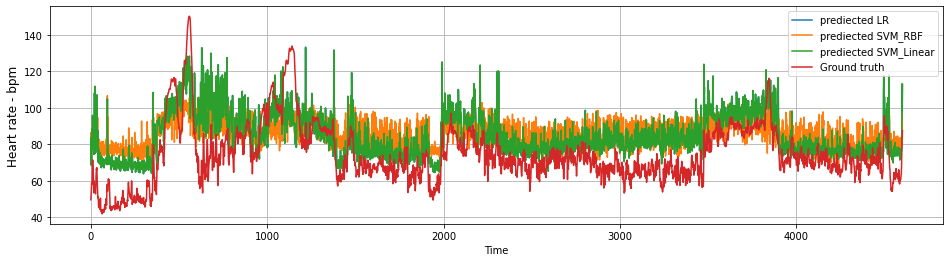

In [15]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( regressor_LR.predict(S1_X), label = 'prediected LR')
plt.plot( SVM_RBF.predict(S1_X), label = 'prediected SVM_RBF')
plt.plot( SVM_Linear.predict(S1_X), label = 'prediected SVM_Linear')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()